In [1]:
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import tarfile
from IPython.display import display, Image
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from scipy import ndimage
from six.moves import cPickle as pickle
import tensorflow as tf

In [2]:
train_filename = 'pngResampled1000.tar.gz'
test_filename = 'trainsetpngResampled100.tar.gz'

In [3]:
# extracting the datasets
num_classes = 256
np.random.seed(133)

def maybe_extract(filename, force=False):
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz
  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s already present - Skipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    sys.stdout.flush()
    tar.extractall()
    tar.close()
  data_folders = [
    os.path.join(root, d) for d in sorted(os.listdir(root))
    if os.path.isdir(os.path.join(root, d))]
  if len(data_folders) != num_classes:
    raise Exception(
      'Expected %d folders, one per class. Found %d instead.' % (
        num_classes, len(data_folders)))
  print(data_folders)
  return data_folders
  
train_folders = maybe_extract(train_filename)
test_folders = maybe_extract(test_filename)

Extracting data for pngResampled1000. This may take a while. Please wait.
['pngResampled1000/0', 'pngResampled1000/1', 'pngResampled1000/10', 'pngResampled1000/100', 'pngResampled1000/101', 'pngResampled1000/102', 'pngResampled1000/103', 'pngResampled1000/104', 'pngResampled1000/105', 'pngResampled1000/106', 'pngResampled1000/107', 'pngResampled1000/108', 'pngResampled1000/109', 'pngResampled1000/11', 'pngResampled1000/110', 'pngResampled1000/111', 'pngResampled1000/112', 'pngResampled1000/113', 'pngResampled1000/114', 'pngResampled1000/115', 'pngResampled1000/116', 'pngResampled1000/117', 'pngResampled1000/118', 'pngResampled1000/119', 'pngResampled1000/12', 'pngResampled1000/120', 'pngResampled1000/121', 'pngResampled1000/122', 'pngResampled1000/123', 'pngResampled1000/124', 'pngResampled1000/125', 'pngResampled1000/126', 'pngResampled1000/127', 'pngResampled1000/128', 'pngResampled1000/129', 'pngResampled1000/13', 'pngResampled1000/130', 'pngResampled1000/131', 'pngResampled1000/132

In [5]:
# have a look at data
import random
import hashlib

def disp_samples(data_folders, sample_size):
  for folder in data_folders:
    print(folder)
    image_files = os.listdir(folder)
    image_sample = random.sample(image_files, sample_size)
    for image in image_sample:
      image_file = os.path.join(folder, image)
      i = Image(filename=image_file)
      display(i)

In [6]:
disp_samples(train_folders, 1)

pngResampled1000/0


pngResampled1000/1


pngResampled1000/10


pngResampled1000/100


pngResampled1000/101


pngResampled1000/102


pngResampled1000/103


pngResampled1000/104


pngResampled1000/105


pngResampled1000/106


pngResampled1000/107


pngResampled1000/108


pngResampled1000/109


pngResampled1000/11


pngResampled1000/110


pngResampled1000/111


pngResampled1000/112


pngResampled1000/113


pngResampled1000/114


pngResampled1000/115


pngResampled1000/116


pngResampled1000/117


pngResampled1000/118


pngResampled1000/119


pngResampled1000/12


pngResampled1000/120


pngResampled1000/121


pngResampled1000/122


pngResampled1000/123


pngResampled1000/124


pngResampled1000/125


pngResampled1000/126


pngResampled1000/127


pngResampled1000/128


pngResampled1000/129


pngResampled1000/13


pngResampled1000/130


pngResampled1000/131


pngResampled1000/132


pngResampled1000/133


pngResampled1000/134


pngResampled1000/135


pngResampled1000/136


pngResampled1000/137


pngResampled1000/138


pngResampled1000/139


pngResampled1000/14


pngResampled1000/140


pngResampled1000/141


pngResampled1000/142


pngResampled1000/143


pngResampled1000/144


pngResampled1000/145


pngResampled1000/146


pngResampled1000/147


pngResampled1000/148


pngResampled1000/149


pngResampled1000/15


pngResampled1000/150


pngResampled1000/151


pngResampled1000/152


pngResampled1000/153


pngResampled1000/154


pngResampled1000/155


pngResampled1000/156


pngResampled1000/157


pngResampled1000/158


pngResampled1000/159


pngResampled1000/16


pngResampled1000/160


pngResampled1000/161


pngResampled1000/162


pngResampled1000/163


pngResampled1000/164


pngResampled1000/165


pngResampled1000/166


pngResampled1000/167


pngResampled1000/168


pngResampled1000/169


pngResampled1000/17


pngResampled1000/170


pngResampled1000/171


pngResampled1000/172


pngResampled1000/173


pngResampled1000/174


pngResampled1000/175


pngResampled1000/176


pngResampled1000/177


pngResampled1000/178


pngResampled1000/179


pngResampled1000/18


pngResampled1000/180


pngResampled1000/181


pngResampled1000/182


pngResampled1000/183


pngResampled1000/184


pngResampled1000/185


pngResampled1000/186


pngResampled1000/187


pngResampled1000/188


pngResampled1000/189


pngResampled1000/19


pngResampled1000/190


pngResampled1000/191


pngResampled1000/192


pngResampled1000/193


pngResampled1000/194


pngResampled1000/195


pngResampled1000/196


pngResampled1000/197


pngResampled1000/198


pngResampled1000/199


pngResampled1000/2


pngResampled1000/20


pngResampled1000/200


pngResampled1000/201


pngResampled1000/202


pngResampled1000/203


pngResampled1000/204


pngResampled1000/205


pngResampled1000/206


pngResampled1000/207


pngResampled1000/208


pngResampled1000/209


pngResampled1000/21


pngResampled1000/210


pngResampled1000/211


pngResampled1000/212


pngResampled1000/213


pngResampled1000/214


pngResampled1000/215


pngResampled1000/216


pngResampled1000/217


pngResampled1000/218


pngResampled1000/219


pngResampled1000/22


pngResampled1000/220


pngResampled1000/221


pngResampled1000/222


pngResampled1000/223


pngResampled1000/224


pngResampled1000/225


pngResampled1000/226


pngResampled1000/227


pngResampled1000/228


pngResampled1000/229


pngResampled1000/23


pngResampled1000/230


pngResampled1000/231


pngResampled1000/232


pngResampled1000/233


pngResampled1000/234


pngResampled1000/235


pngResampled1000/236


pngResampled1000/237


pngResampled1000/238


pngResampled1000/239


pngResampled1000/24


pngResampled1000/240


pngResampled1000/241


pngResampled1000/242


pngResampled1000/243


pngResampled1000/244


pngResampled1000/245


pngResampled1000/246


pngResampled1000/247


pngResampled1000/248


pngResampled1000/249


pngResampled1000/25


pngResampled1000/250


pngResampled1000/251


pngResampled1000/252


pngResampled1000/253


pngResampled1000/254


pngResampled1000/255


pngResampled1000/26


pngResampled1000/27


pngResampled1000/28


pngResampled1000/29


pngResampled1000/3


pngResampled1000/30


pngResampled1000/31


pngResampled1000/32


pngResampled1000/33


pngResampled1000/34


pngResampled1000/35


pngResampled1000/36


pngResampled1000/37


pngResampled1000/38


pngResampled1000/39


pngResampled1000/4


pngResampled1000/40


pngResampled1000/41


pngResampled1000/42


pngResampled1000/43


pngResampled1000/44


pngResampled1000/45


pngResampled1000/46


pngResampled1000/47


pngResampled1000/48


pngResampled1000/49


pngResampled1000/5


pngResampled1000/50


pngResampled1000/51


pngResampled1000/52


pngResampled1000/53


pngResampled1000/54


pngResampled1000/55


pngResampled1000/56


pngResampled1000/57


pngResampled1000/58


pngResampled1000/59


pngResampled1000/6


pngResampled1000/60


pngResampled1000/61


pngResampled1000/62


pngResampled1000/63


pngResampled1000/64


pngResampled1000/65


pngResampled1000/66


pngResampled1000/67


pngResampled1000/68


pngResampled1000/69


pngResampled1000/7


pngResampled1000/70


pngResampled1000/71


pngResampled1000/72


pngResampled1000/73


pngResampled1000/74


pngResampled1000/75


pngResampled1000/76


pngResampled1000/77


pngResampled1000/78


pngResampled1000/79


pngResampled1000/8


pngResampled1000/80


pngResampled1000/81


pngResampled1000/82


pngResampled1000/83


pngResampled1000/84


pngResampled1000/85


pngResampled1000/86


pngResampled1000/87


pngResampled1000/88


pngResampled1000/89


pngResampled1000/9


pngResampled1000/90


pngResampled1000/91


pngResampled1000/92


pngResampled1000/93


pngResampled1000/94


pngResampled1000/95


pngResampled1000/96


pngResampled1000/97


pngResampled1000/98


pngResampled1000/99


In [337]:
#Pickling the data

image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.

        
def maybe_pickle(data_folders,force=False):
  dataset_names = []
  tsize_per_class = 1000
  start_t = 0
  end_t = tsize_per_class
  trainDataset = np.ndarray((256000, image_size, image_size), dtype=np.uint8)
  labels = np.ndarray(256000, dtype=np.int32)
  for folder in data_folders:
    set_filename = folder + '.pickle'
    dataset_names.append(set_filename)
    if os.path.exists(set_filename) and not force:
      # You may override by setting force=True.
      print('%s already present - Skipping pickling.' % set_filename)
    else:
      print('Pickling %s.' % set_filename)
      image_files = os.listdir(folder)
      dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.uint8)
      image_index = 0
      print(folder)
      for image in os.listdir(folder):
            image_file = os.path.join(folder, image)
            image_data = (ndimage.imread(image_file).astype(int))
            dataset[image_index, :, :] = image_data
            image_index += 1
print(testDataset.shape)
print(labelsTestDataset.shape)
      num_images = image_index
      dataset = dataset[0:num_images, :, :]
      trainDataset[start_t:end_t, :, :] = dataset
      labels[start_t:end_t] = folder.split("/")[1]
      start_t += tsize_per_class
      end_t += tsize_per_class
      try:
        with open(set_filename, 'wb') as f:
          pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
      except Exception as e:
        print('Unable to save data to', set_filename, ':', e)
  
  return dataset_names, trainDataset, labels

train_datasets, trainDataset, labels = maybe_pickle(train_folders)
#print (train_datasets)
print(trainDataset)
print(labels)
#test_datasets = maybe_pickle(test_folders)

len(trainDataset)
len(labels)
print(trainDataset.shape)
print(labels.shape)

Pickling pngResampled1000/0.pickle.
pngResampled1000/0
Pickling pngResampled1000/1.pickle.
pngResampled1000/1
Pickling pngResampled1000/10.pickle.
pngResampled1000/10
Pickling pngResampled1000/100.pickle.
pngResampled1000/100
Pickling pngResampled1000/101.pickle.
pngResampled1000/101
Pickling pngResampled1000/102.pickle.
pngResampled1000/102
Pickling pngResampled1000/103.pickle.
pngResampled1000/103
Pickling pngResampled1000/104.pickle.
pngResampled1000/104
Pickling pngResampled1000/105.pickle.
pngResampled1000/105
Pickling pngResampled1000/106.pickle.
pngResampled1000/106
Pickling pngResampled1000/107.pickle.
pngResampled1000/107
Pickling pngResampled1000/108.pickle.
pngResampled1000/108
Pickling pngResampled1000/109.pickle.
pngResampled1000/109
Pickling pngResampled1000/11.pickle.
pngResampled1000/11
Pickling pngResampled1000/110.pickle.
pngResampled1000/110
Pickling pngResampled1000/111.pickle.
pngResampled1000/111
Pickling pngResampled1000/112.pickle.
pngResampled1000/112
Pickling 

24456
12


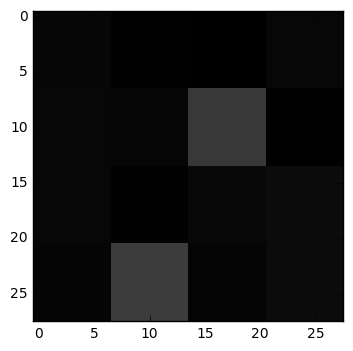

12.0

In [403]:
rand_image = random.randint(0, 25600)

print (rand_image)

plt.imshow(trainDataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (labels[rand_image])
plt.show()
np.mean(trainDataset[rand_image])
        




In [356]:
#test the data is balance

def disp_number_images(data_folders):
  for folder in data_folders:
    pickle_filename = ''.join(folder) + '.pickle'
    try:
      with open(pickle_filename, 'rb') as f:
        dataset = pickle.load(f)
    except Exception as e:
      print('Unable to read data from', pickle_filename, ':', e)
      return
    print('Number of images in ', folder, ' : ', len(dataset))
    
disp_number_images(train_folders)
disp_number_images(test_folders)  

Number of images in  pngResampled1000/0  :  1000
Number of images in  pngResampled1000/1  :  1000
Number of images in  pngResampled1000/10  :  1000
Number of images in  pngResampled1000/100  :  1000
Number of images in  pngResampled1000/101  :  1000
Number of images in  pngResampled1000/102  :  1000
Number of images in  pngResampled1000/103  :  1000
Number of images in  pngResampled1000/104  :  1000
Number of images in  pngResampled1000/105  :  1000
Number of images in  pngResampled1000/106  :  1000
Number of images in  pngResampled1000/107  :  1000
Number of images in  pngResampled1000/108  :  1000
Number of images in  pngResampled1000/109  :  1000
Number of images in  pngResampled1000/11  :  1000
Number of images in  pngResampled1000/110  :  1000
Number of images in  pngResampled1000/111  :  1000
Number of images in  pngResampled1000/112  :  1000
Number of images in  pngResampled1000/113  :  1000
Number of images in  pngResampled1000/114  :  1000
Number of images in  pngResampled1000

In [275]:
#Merge the data

def make_arrays(nb_rows, img_size):
  if nb_rows:
    dataset = np.ndarray((nb_rows, img_size, img_size), dtype=np.float32)
    labels = np.ndarray(nb_rows, dtype=np.int32)
  else:
    dataset, labels = None, None
  return dataset, labels

def merge_datasets(pickle_files, train_size):
  num_classes = len(pickle_files)
  train_dataset, train_labels = make_arrays(train_size, image_size)
  tsize_per_class = train_size // num_classes
    
  start_t = 0, 0
  end_t = tsize_per_class
  end_l = tsize_per_class
  for label, pickle_file in enumerate(pickle_files):       
    try:
      with open(pickle_file, 'rb') as f:
        letter_set = pickle.load(f)
        # let's shuffle the letters to have random validation and training set
        np.random.shuffle(letter_set)
                    
        train_letter = letter_set[0:tsize_per_class, :, :]
        train_dataset[start_t:end_t, :, :] = train_letter
        train_labels[start_t:end_t] = label
        start_t += tsize_per_class
        end_t += tsize_per_class
    except Exception as e:
      print('Unable to process data from', pickle_file, ':', e)
      raise
    
  return train_dataset, train_labels
            
            
train_size = 25600
test_size = 2560

train_dataset, train_labels = merge_datasets(
  train_datasets, train_size)
test_dataset, test_labels = merge_datasets(test_datasets, test_size)

print('Training:', train_dataset.shape, train_labels.shape)
print('Testing:', test_dataset.shape, test_labels.shape)

Unable to process data from pngResampled1000/0.pickle : failed to coerce slice entry of type tuple to integer


IndexError: failed to coerce slice entry of type tuple to integer

70483
78


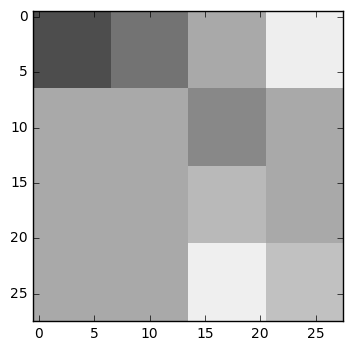

169.0

In [261]:
rand_image = random.randint(0, 255000)

print (rand_image)
plt.imshow(train_dataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (train_labels[rand_image])
plt.show()
np.mean(train_dataset[rand_image])


br_list = pickle.load(open("trainsetpngResampled100/200.pickle", "rb"))
random_letter = random.choice(br_list)
plt.imshow(random_letter,cmap='gray', interpolation='nearest', vmin=0, vmax=255)

In [214]:
rand_image = random.randint(0, 250000)

print (rand_image)

plt.imshow(train_dataset[rand_image], cmap='gray', interpolation='nearest', vmin=0, vmax=255)
print (train_labels[rand_image])
plt.show()
train_dataset[rand_image]

236980


IndexError: index 236980 is out of bounds for axis 0 with size 25000

In [268]:
dataset = np.ndarray((100, 28, 28), dtype=np.uint8)
dataset
labels = np.ndarray(100, dtype=np.int8)
labels
num_classes = len(train_datasets)
num_classes
tsize_per_class = 256000 // 256
tsize_per_class
start_t = 0
end_t = tsize_per_class
end_l = tsize_per_class
label =167
#for label, pickle_file in enumerate(train_datasets): 
with open('pngResampled1000/167.pickle', 'rb') as f:
    letter_set = pickle.load(f)
    train_letter = letter_set[0:tsize_per_class, :, :]
    train_dataset[start_t:tsize_per_class, :, :] = train_letter
    train_labels[start_t:end_t] = label
train_labels


array([167, 167, 167, ..., 255, 255, 255], dtype=int32)